In [ ]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()
#upload file CustomerData.csv

Saving CustomerData.csv to CustomerData (2).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['CustomerData.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df[["CustomerID","noofOrders","sumBasketValue"]]

,CustomerID,noofOrders,sumBasketValue
0,93529730,9,50.4
1,112689466,17,63.1
2,36492996,4,30.8
3,167099876,4,14.7
4,190383190,3,6.5
...,...,...,...
162949,74848762,1,40.5
162950,194329530,1,7.0
162951,63808992,1,4.0
162952,122790054,1,3.9


In [ ]:
df[["CustomerID", "noofOrders","sumBasketValue"]].describe()

,CustomerID,FrequencyScore,MonetaryScore
count,1.629540e+05,162954.000000,162954.000000
mean,8.210683e+07,2.032205,2.495244
std,5.623636e+07,1.171705,1.120029
min,2.746200e+04,1.000000,1.000000
25%,3.619502e+07,1.000000,1.000000
50%,7.306845e+07,2.000000,2.000000
75%,1.126347e+08,3.000000,3.000000
max,1.982852e+08,4.000000,4.000000


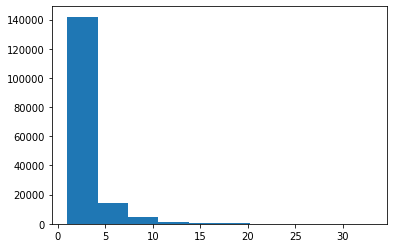

In [ ]:
plt.hist(df["noofOrders"])
plt.show()

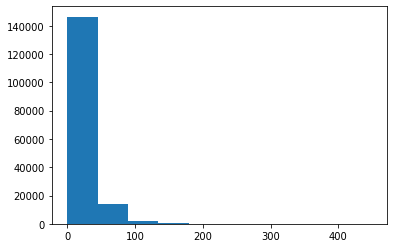

In [ ]:
plt.hist(df["sumBasketValue"])
plt.show()

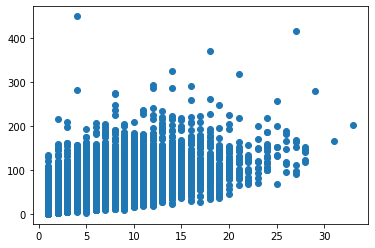

In [ ]:
plt.scatter(df["noofOrders"], df["sumBasketValue"])
plt.show()

In [ ]:
# Creating input features variable
X = df.loc[:,'noofOrders':'sumBasketValue']
X.head()

,noofOrders,sumBasketValue
0,9,50.4
1,17,63.1
2,4,30.8
3,4,14.7
4,3,6.5


In [ ]:
# Number of clusters (Configurable) - Initially we're attempting based on the 3 Segments (Low, Mid, High)
k=3

In [ ]:
# Scaling input using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xstd = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
# Run and train main K-means algorithm based on all input features
from sklearn.cluster import KMeans
model = KMeans(n_clusters=k, random_state=0)
model.fit(Xstd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
# Review output cluster labels
cluster_labels = model.labels_
print("Assigned cluster labels: \n", cluster_labels)

Assigned cluster labels: 
 [0 0 2 ... 1 1 1]


In [ ]:
# Review Centroids of clusters
centroids = model.cluster_centers_
print("Location of centroids: ")
print(centroids)

Location of centroids: 
[[ 3.00263429  2.79603829]
 [-0.45053187 -0.45965973]
 [ 0.66801908  0.73963073]]


In [ ]:
# Append clusters to input features table
Xstd['clusters'] = cluster_labels
Xstd.head()

,noofOrders,sumBasketValue,clusters
0,2.838046,1.441052,0
1,6.306841,2.072409,0
2,0.670050,0.466674,2
3,0.670050,-0.333708,2
4,0.236450,-0.741356,1


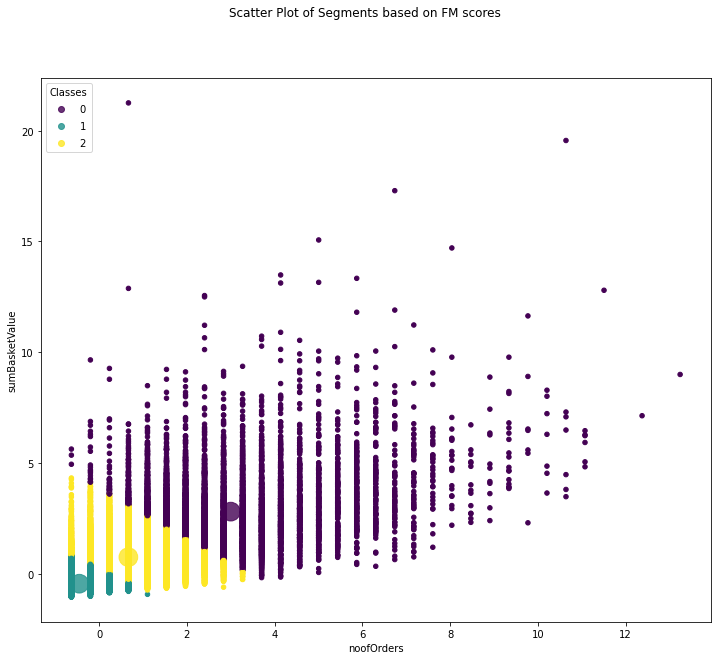

In [ ]:
# Scatter plot of data coloured by cluster they belong to
fig,(ax) = plt.subplots(1);
fig.suptitle('Scatter Plot of Segments based on FM scores');

Xstd.plot.scatter(x = 'noofOrders', y = 'sumBasketValue', c=Xstd['clusters'], colormap='viridis', ax=ax, colorbar=False,figsize = (12,10));
scatter = ax.scatter(centroids[:,0], centroids[:,1], marker='o', s=350, alpha=.8, c=range(0,k), cmap='viridis');
ax.legend(*scatter.legend_elements(),loc="upper left", title="Classes")




In [ ]:
from sklearn import metrics
metrics.silhouette_score(Xstd, cluster_labels, metric='euclidean')

0.6460424079385413

In [ ]:
model.inertia_

95542.96795288143

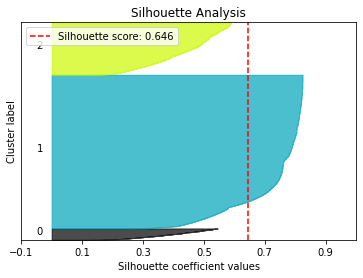

In [ ]:
# Plotting Silhouette Score
!pip install scikit-plot

from scikitplot.metrics import plot_silhouette
plot_silhouette(Xstd, cluster_labels);

In [ ]:
inertias = []
ss = []

for k in range(2,10):
    
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10, random_state=42)
    kmeans.fit(Xstd)
    inertias.append(kmeans.inertia_)
    ss.append(metrics.silhouette_score(Xstd, kmeans.labels_, metric='euclidean'))

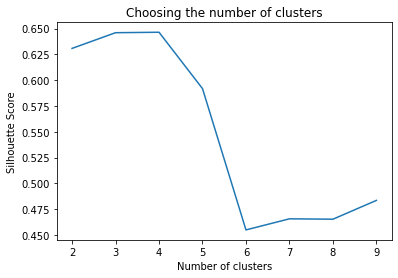

In [ ]:
plt.plot(range(2, 10), ss)
plt.title('Choosing the number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Based on elbow graph the optimal K value is 6 with Silhouette score:
ss[6]

0.46536437049689555

In [ ]:
df['Cluster'] = cluster_labels
df.Cluster.unique()

array([0, 2, 1], dtype=int32)

In [ ]:
df['Profile'] = cluster_labels
df['Profile'].replace({0: "High Value", 1: "Low Value", 2: "Mid Value"}, inplace = True)

In [ ]:
df.head()

,CustomerID,minOrderDate,maxOrderDate,noofOrders,sumBasketValue,Cluster,Profile
0,93529730,2021-01-01,2021-01-29,9,50.4,0,High Value
1,112689466,2021-01-01,2021-01-27,17,63.1,0,High Value
2,36492996,2021-01-01,2021-01-15,4,30.8,2,Mid Value
3,167099876,2021-01-01,2021-01-28,4,14.7,2,Mid Value
4,190383190,2021-01-01,2021-01-23,3,6.5,1,Low Value


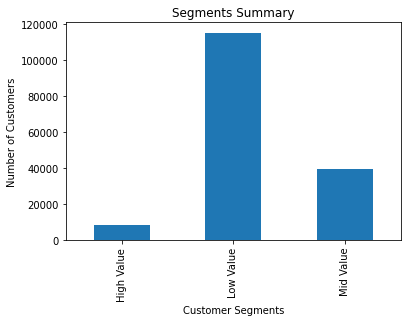

In [ ]:
df.groupby('Profile').Profile.count().plot.bar()
plt.xlabel("Customer Segments")
plt.ylabel("Number of Customers")
plt.title("Segments Summary");